In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sowfadict as sowfa
import tools
import pandas as pd
from matplotlib.colors import Normalize
import gzip
import matplotlib.colors as colors
from scipy.interpolate import interp1d

# Set user variables

In [3]:
fdir    = '/projects/mmc/NWTCRegion/'
terrstr = 'D2'
simstr  = ['PGx2.2En4_zi1100']*3

caselbl = ['a.) Turb.','b.) Laminar','c.) Pert.']
cases   = ['M2_{}_TurbBC'.format(terrstr),'M2_{}_NoTurbBC'.format(terrstr),'M2_{}_PertBC'.format(terrstr)]
if terrstr == 'SR':
    casec   = ['navy','darkturquoise','blue']
    terrstr_f = 'Complex Terrain'
elif terrstr == 'D2':
    casec   = ['red','goldenrod','darkred']
    terrstr_f = 'Smoothed Terrain'
casece  = [casec[0],'none',casec[2]]#,'none']
casecf  = ['none',casec[1],'none']#,casec[3]]
casem   = ['o','x','+']
caselw  = ['3','2','3','2']
casea   = [0.8,1.0,0.8,1.0]
casesz  = [50,15,50,15]
casels  = ['-',':','--']
ncases  = np.shape(cases)[0]


timedir = 30600
nx = 896; ny = 208; nz = 75

lblsize = 14.0
txtsize = 12.0
legsize = 10.0
savedir = '/home/phawbeck/SOWFA/Terrain/img/'


# Read in the x, y, and z coords

In [4]:
xxf = gzip.open('{}/{}/NWTC.run.{}/constant/ccx.gz'.format(fdir,simstr[0],cases[0]),'r')
xx = xxf.readlines()[22:-15]
xxf.close()

yyf = gzip.open('{}/{}/NWTC.run.{}/constant/ccy.gz'.format(fdir,simstr[0],cases[0]),'r')
yy = yyf.readlines()[22:-15]
yyf.close()

zzf = gzip.open('{}/{}/NWTC.run.{}/constant/ccz.gz'.format(fdir,simstr[0],cases[0]),'r')
zz = zzf.readlines()[22:-15]
zzf.close()

### Turn them into a grid for the lowest layer

In [5]:
x = np.zeros((nx,ny,nz))
y = np.zeros((nx,ny,nz))
z = np.zeros((nx,ny,nz))

ct = 0
for kk in range(0,nz):
    for jj in range(0,ny):
        for ii in range(0,nx):
            x[ii,jj,kk] = np.float(xx[ct])
            y[ii,jj,kk] = np.float(yy[ct])
            z[ii,jj,kk] = np.float(zz[ct])
            ct += 1

# Read in U and T averages

In [6]:
u   = np.zeros((ncases,nx,ny,nz))
v   = np.zeros((ncases,nx,ny,nz))
w   = np.zeros((ncases,nx,ny,nz))
tke = np.zeros((ncases,nx,ny,nz))

for cc in range(0,ncases):
    
    Uf = gzip.open('{}/{}/NWTC.run.{}/{}/U.gz'.format(fdir,simstr[cc],cases[cc],timedir),'r')
    U1 = Uf.readlines()[22:-15]
    Uf.close()
    for ll,line in enumerate(U1):
        U1[ll] = line.decode()
    print('Got U')

    kf = gzip.open('{}/{}/NWTC.run.{}/{}/kResolved.gz'.format(fdir,simstr[cc],cases[cc],timedir),'r')
    TKE1 = kf.readlines()[22:-15]
    kf.close()
    for ll,line in enumerate(TKE1):
        TKE1[ll] = line.decode()    
    print('Got TKE')
    
    ct = 0
    for kk in range(0,nz):
        for jj in range(0,ny):
            for ii in range(0,nx):
                uline   = U1[ct].replace('(','').replace(')','').split()
                tkeline = TKE1[ct].replace('(','').replace(')','').split()
                u[cc,ii,jj,kk]   = np.float(uline[0])
                v[cc,ii,jj,kk]   = np.float(uline[1])
                w[cc,ii,jj,kk]   = np.float(uline[2])
                tke[cc,ii,jj,kk] = np.float(tkeline[0])
                ct += 1
    print('Done with {}'.format(cases[cc]))

Got U
Got TKE
Done with M2_D2_TurbBC
Got U
Got TKE
Done with M2_D2_NoTurbBC
Got U
Got TKE
Done with M2_D2_PertBC


### Horizontal Slices

/home/phawbeck/SOWFA/Terrain/img/PGx2.2En4_zi1100_D2_Uslice_xy_110m.png


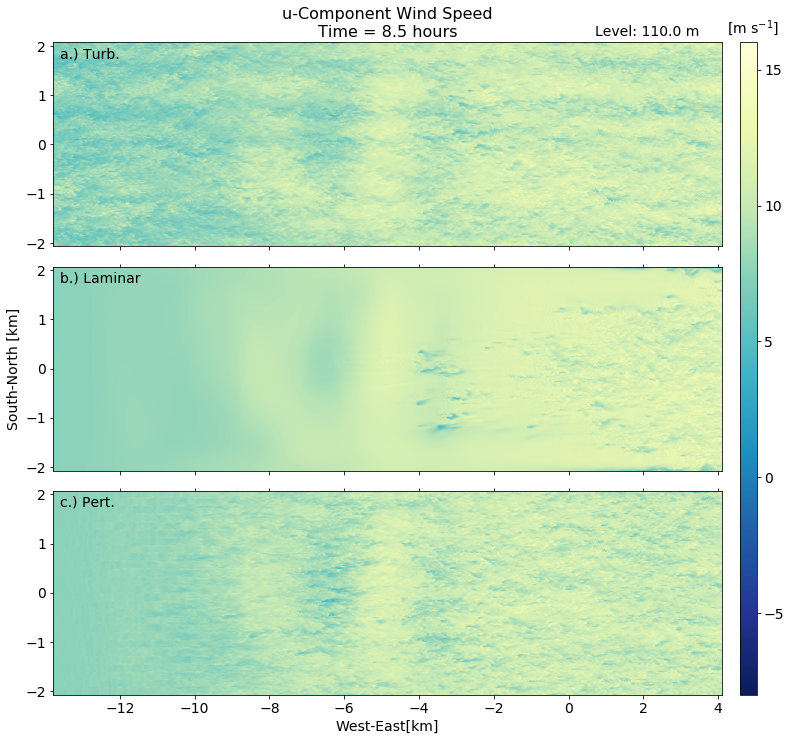

In [7]:
savefig = False
lvl = 5
umin = -8; umax = 16
textx = -13.6 ; texty = 1.98

fig, ax = plt.subplots(nrows=ncases,figsize=(12,12),sharex=True)
fig.subplots_adjust(hspace=0.1)
for cc in range(0,ncases):
    cont = ax[cc].pcolormesh(x[:,:,lvl]/1000.0,y[:,:,lvl]/1000.0,u[cc,:,:,lvl],rasterized=True,
                             norm=Normalize(umin,umax),cmap=plt.cm.YlGnBu_r)
    ax[cc].tick_params(labelsize=14)
    if cc > 0: ax[cc].tick_params(top=True)
    ax[cc].text(textx,texty,caselbl[cc],size=14,va='top',ha='left')
ax[1].set_ylabel('South-North [km]',size=14)
ax[2].set_xlabel('West-East[km]',size=14)
cax1 = fig.add_axes([0.92, 0.125, 0.02, 0.755])
plt.colorbar(cont,cax1)
cax1.tick_params(labelsize=14)
cax1.text(10.0,umax*1.01,'[m s$^{-1}$]',size=14,ha='center',va='bottom')
ax[0].set_title('u-Component Wind Speed\nTime = {} hours'.format(timedir/3600),size=16)
ax[0].text(3.5,2.15,'Level: {} m'.format(10.0 + lvl*20.0),va='bottom',ha='right',size=14)
print('{}{}_{}_Uslice_xy_{}m.png'.format(savedir,simstr[cc],terrstr,int(10.0 + 20.0*lvl)))
if savefig:
    plt.savefig('{}{}_{}_Uslice_xy_{}m.png'.format(savedir,simstr[cc].replace('.','p'),terrstr,int(10.0 + 20.0*lvl)))
    plt.savefig('{}{}_{}_Uslice_xy_{}m.pdf'.format(savedir,simstr[cc].replace('.','p'),terrstr,int(10.0 + 20.0*lvl)))
plt.show()


2.25409601994
5.35329553937
1.71573112476
/home/phawbeck/SOWFA/Terrain/img/PGx2.2En4_zi1100_D2_TKEslice_xy_70m.png


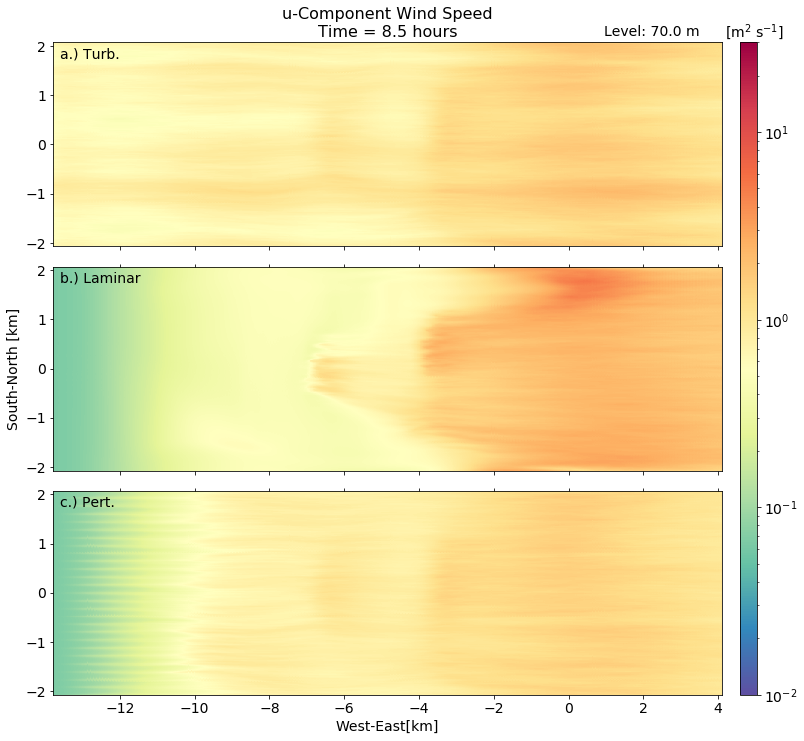

In [8]:
savefig = False
lvl = 3
textx = -13.6 ; texty = 1.98
#tkemin = 5e-2; tkemax = 5
tkemin = 1e-2; tkemax = 30
fig, ax = plt.subplots(nrows=ncases,figsize=(12,12),sharex=True)
fig.subplots_adjust(hspace=0.1)
for cc in range(0,ncases):
    print(np.max(tke[cc,:,:,lvl]))
    cont = ax[cc].pcolormesh(x[:,:,lvl]/1000.0,y[:,:,lvl]/1000.0,tke[cc,:,:,lvl],rasterized=True,
                             cmap=plt.cm.Spectral_r,norm=colors.LogNorm(tkemin,tkemax))
    ax[cc].tick_params(labelsize=14)
    if cc > 0: ax[cc].tick_params(top=True)
    ax[cc].text(textx,texty,caselbl[cc],size=14,va='top',ha='left')
ax[1].set_ylabel('South-North [km]',size=14)
ax[2].set_xlabel('West-East[km]',size=14)
cax1 = fig.add_axes([0.92, 0.125, 0.02, 0.755])
plt.colorbar(cont,cax1)
cax1.tick_params(labelsize=14)
cax1.text(10.0,tkemax*1.01,'[m$^2$ s$^{-1}$]',size=14,ha='center',va='bottom')
ax[0].set_title('u-Component Wind Speed\nTime = {} hours'.format(timedir/3600),size=16)
ax[0].text(3.5,2.15,'Level: {} m'.format(10.0 + lvl*20.0),va='bottom',ha='right',size=14)
print('{}{}_{}_TKEslice_xy_{}m.png'.format(savedir,simstr[cc],terrstr,int(10.0 + 20.0*lvl)))
if savefig:
    plt.savefig('{}{}_{}_TKEslice_xy_{}m.png'.format(savedir,simstr[cc].replace('.','p'),terrstr,int(10.0 + 20.0*lvl)))
    plt.savefig('{}{}_{}_TKEslice_xy_{}m.pdf'.format(savedir,simstr[cc].replace('.','p'),terrstr,int(10.0 + 20.0*lvl)))
plt.show()


### Vertical Slices

1.754689193 0.155630268565
2.3209452452 0.0198736659153
1.641500014 0.0221699113104
/home/phawbeck/SOWFA/Terrain/img/PGx2.2En4_zi1100_D2_TKEslice_xz_y10m.png


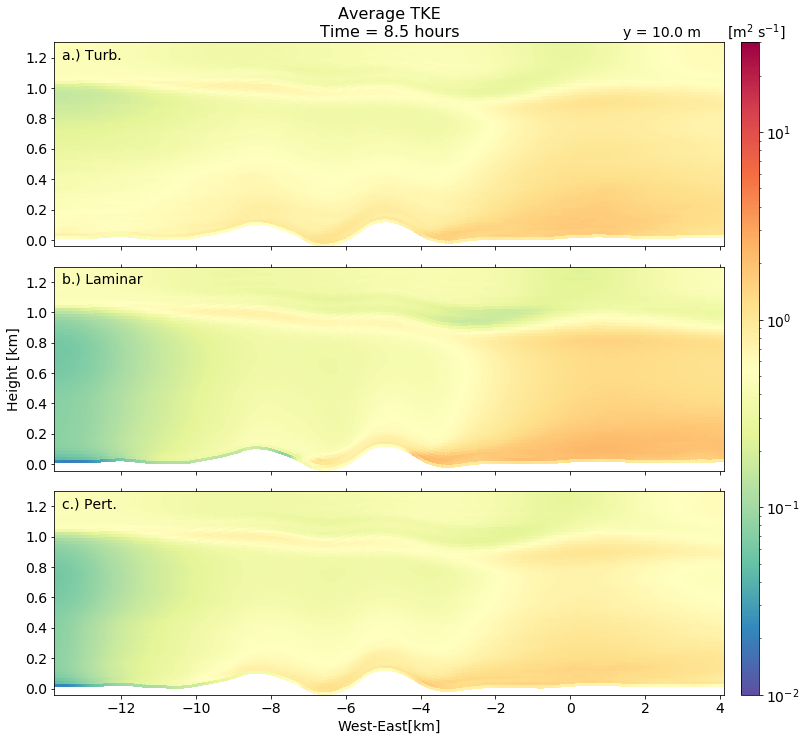

In [9]:
savefig = False
yloc = int(ny/2)
# For accented 2.2_1100_D2 cases:
#tkemin = 5e-2; tkemax = 5
tkemin = 1e-2; tkemax = 30
textx = -13.6 ; texty = 1.26
ymin = np.min(z[:,yloc,:]/1000.0); ymax = 1.3

fig, ax = plt.subplots(nrows=ncases,figsize=(12,12),sharex=True)
fig.subplots_adjust(hspace=0.1)
for cc in range(0,ncases):
    print(np.max(tke[cc,:,yloc,:]),np.min(tke[cc,:,yloc,:]))
    cont = ax[cc].pcolormesh(x[:,yloc,:]/1000.0,z[:,yloc,:]/1000.0,tke[cc,:,yloc,:],rasterized=True,
                             cmap=plt.cm.Spectral_r,norm=colors.LogNorm(vmin=tkemin,vmax=tkemax))
    ax[cc].tick_params(labelsize=14)
    ax[cc].set_ylim(ymin,ymax)
    if cc > 0: ax[cc].tick_params(top=True)
    ax[cc].text(textx,texty,caselbl[cc],size=14,va='top',ha='left',color='k')
ax[1].set_ylabel('Height [km]',size=14)
ax[2].set_xlabel('West-East[km]',size=14)
cax1 = fig.add_axes([0.92, 0.125, 0.02, 0.755])
plt.colorbar(cont,cax1)
cax1.tick_params(labelsize=14)
cax1.text(10.0,tkemax*1.01,'[m$^2$ s$^{-1}$]',size=14,ha='center',va='bottom')
ax[0].set_title('Average TKE\nTime = {} hours'.format(timedir/3600),size=16)
ax[0].text(3.5,1.32,'y = {0:2.1f} m'.format(y[0,yloc,0]),va='bottom',ha='right',size=14)
print('{}{}_{}_TKEslice_xz_y{}m.png'.format(savedir,simstr[cc],terrstr,int(y[0,yloc,0])))
if savefig:
    plt.savefig('{}{}_{}_TKEslice_xz_y{}m.png'.format(savedir,simstr[cc].replace('.','p'),terrstr,int(y[0,yloc,0])))
    plt.savefig('{}{}_{}_TKEslice_xz_y{}m.pdf'.format(savedir,simstr[cc].replace('.','p'),terrstr,int(y[0,yloc,0])))
plt.show()


14.3848152754 1.34505847851
14.7160659507 -0.753718612542
14.2760119786 1.07229992663
/home/phawbeck/SOWFA/Terrain/img/PGx2.2En4_zi1100_D2_Uslice_xz_y10m.png


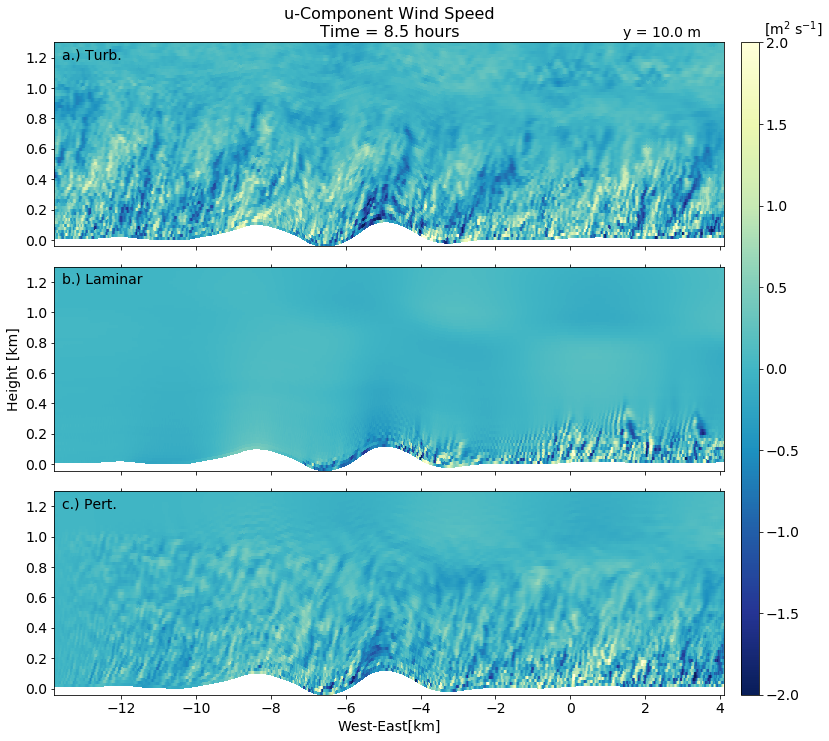

In [14]:
savefig = False
yloc = int(ny/2)
umin = -8; umax = 16
umin = -2; umax = 2
textx = -13.6 ; texty = 1.26
ymin = np.min(z[:,yloc,:]/1000.0); ymax = 1.3

fig, ax = plt.subplots(nrows=ncases,figsize=(12,12),sharex=True)
fig.subplots_adjust(hspace=0.1)
for cc in range(0,ncases):
    print(np.max(u[cc,:,yloc,:]),np.min(u[cc,:,yloc,:]))
    cont = ax[cc].pcolormesh(x[:,yloc,:]/1000.0,z[:,yloc,:]/1000.0,v[cc,:,yloc,:],rasterized=True,
                             cmap=plt.cm.YlGnBu_r,norm=colors.Normalize(umin,umax))
    ax[cc].tick_params(labelsize=14)
    ax[cc].set_ylim(ymin,ymax)
    if cc > 0: ax[cc].tick_params(top=True)
    ax[cc].text(textx,texty,caselbl[cc],size=14,va='top',ha='left',color='k')
ax[1].set_ylabel('Height [km]',size=14)
ax[2].set_xlabel('West-East[km]',size=14)
cax1 = fig.add_axes([0.92, 0.125, 0.02, 0.755])
plt.colorbar(cont,cax1)
cax1.tick_params(labelsize=14)
cax1.text(10.0,umax*1.01,'[m$^2$ s$^{-1}$]',size=14,ha='center',va='bottom')
ax[0].set_title('u-Component Wind Speed\nTime = {} hours'.format(timedir/3600),size=16)
ax[0].text(3.5,1.32,'y = {0:2.1f} m'.format(y[0,yloc,0]),va='bottom',ha='right',size=14)
print('{}{}_{}_Uslice_xz_y{}m.png'.format(savedir,simstr[cc],terrstr,int(y[0,yloc,0])))
if savefig:
    plt.savefig('{}{}_{}_Uslice_xz_y{}m.png'.format(savedir,simstr[cc].replace('.','p'),terrstr,int(y[0,yloc,0])))
    plt.savefig('{}{}_{}_Uslice_xz_y{}m.pdf'.format(savedir,simstr[cc].replace('.','p'),terrstr,int(y[0,yloc,0])))
plt.show()
